# CUNY MSDS DATA622 - Machine Learning & Big Data

## Homework #1 : Exploratory analysis and essay

### Ramnivas Singh
---------------------


__Pre-work__
1. Visit the following website and explore the range of sizes of this dataset (from 100 to 5 million records):
https://excelbianalytics.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/ or
(new) https://www.kaggle.com/datasets
2. Select 2 files to download \
Based on your computer's capabilities (memory, CPU), select 2 files you can handle (recommended one small, one large)
3. Download the files
4. Review the structure and content of the tables, and think about the data sets (structure, size, dependencies, labels, etc)
5. Consider the similarities and differences in the two data sets you have downloaded
6. Think about how to analyze and predict an outcome based on the datasets available
7. Based on the data you have, think which two machine learning algorithms presented so far could be used to analyze the data

__Deliverable__
1. Essay (minimum 500 word document)
2. Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document) \
Explore how to analyze and predict an outcome based on the data available. This will be an exploratory exercise, so feel free to show errors and warnings that raise during the analysis. \
Test the code with both datasets selected and compare the results.

__Answer questions such as:__
1. Are the columns of your data correlated?
2. Are there labels in your data? Did that impact your choice of algorithm?
3. What are the pros and cons of each algorithm you selected?
4. How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
5. Which result will you trust if you need to make a business decision?
6. Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
7. How does the analysis between data sets compare?

## EDA Summary

__Customer dataset__ for a retail bank is picked up for this Exploratory analysis. Every bank wants to hold there customers for sustaining their business so the bank under analysis named as Standard Multinational bank. Below is the customer data of account holders for this bank to answer questions for this analysis.

This dataset is picked up from https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

# Load Packages

In [707]:
# Lets setup python environment and load python libraries for this EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Bank Customer Churn Prediction
## Load Cutomer Data

In [708]:
bank_cust_df = pd.read_csv("Bank Customer Churn Prediction.csv")
bank_cust_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [709]:
bank_cust_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Exploration

This dataset has following columns, few columns are unused, few are used as an inputs and treated as a feature.
churn column is target for 

1. customer_id, unused variable.
2. credit_score, used as input.
3. country, used as input.
4. gender, used as input.
5. age, used as input.
6. tenure, used as input.
7. balance, used as input.
8. products_number, used as input.
9. credit_card, used as input.
10. active_member, used as input.
11. estimated_salary, used as input.
12. churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.


<span style="font-size:16px;">
Just by looking at the dataset I think that as we are only intrested in predicting the people leaving the bank or not, columns like custimer_id and credit score dosen't help.

We can further remove those columns.

But as I say, I think so, that dose not mean it has to be it. 

So before comming to any conclusion let's explore our data even more.

In [710]:
#descriptive statistics summary
bank_cust_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [711]:
bank_cust_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [712]:
bank_cust_df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [713]:
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<span style="font-size:16px;">
**Observation so far**

By doing some of the above steps I can conclude some points as,
1. There is no null values in data set, which is quite good for us
2. There are 9 quantitaive feature and 2 qualitative feature  

## Data Visualization

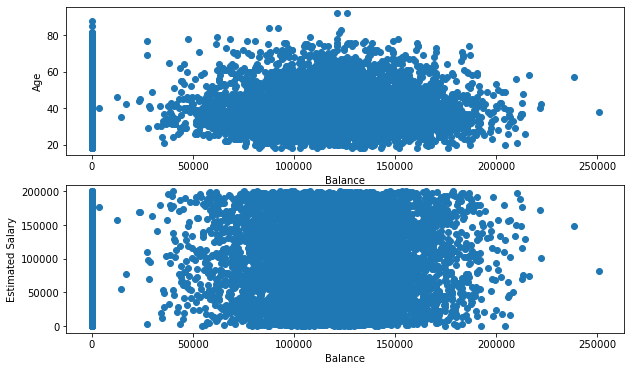

In [714]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = bank_cust_df['balance'], y = bank_cust_df['age'])
ax[0].set_xlabel("Balance")
ax[0].set_ylabel("Age")

ax[1].scatter(x = bank_cust_df['balance'], y = bank_cust_df['estimated_salary'])
ax[1].set_xlabel("Balance")
ax[1].set_ylabel("Estimated Salary")

plt.show()

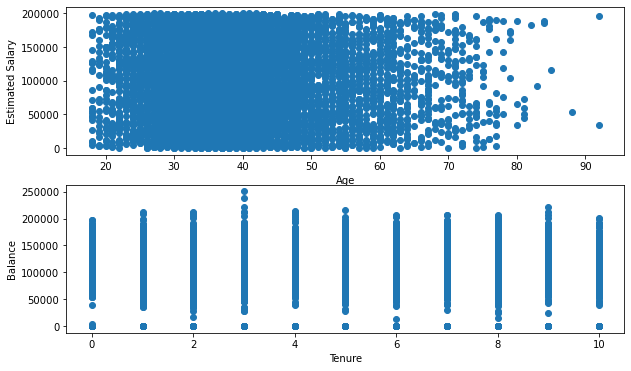

In [715]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = bank_cust_df['age'], y = bank_cust_df['estimated_salary'])
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Estimated Salary")

ax[1].scatter(x = bank_cust_df['tenure'], y=bank_cust_df['balance'])
ax[1].set_xlabel("Tenure")
ax[1].set_ylabel("Balance")

plt.show()

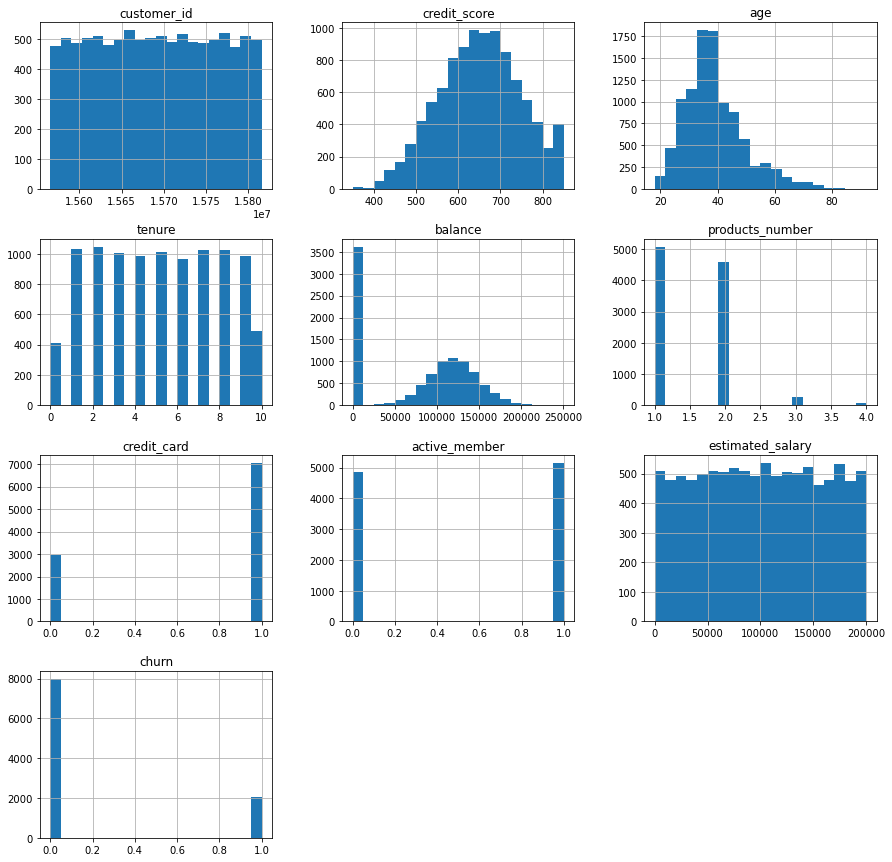

In [716]:
%matplotlib inline
import matplotlib.pyplot as plt
bank_cust_df.hist(bins=20, figsize=(15,15))
plt.show()

<AxesSubplot:>

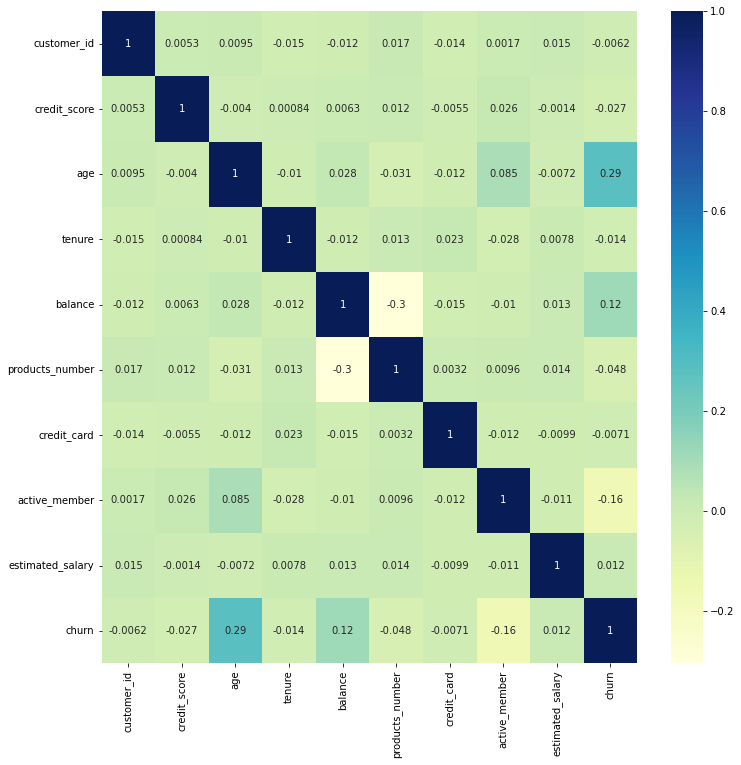

In [717]:
correlation = bank_cust_df.corr()
fig , ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(12)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

<AxesSubplot:>

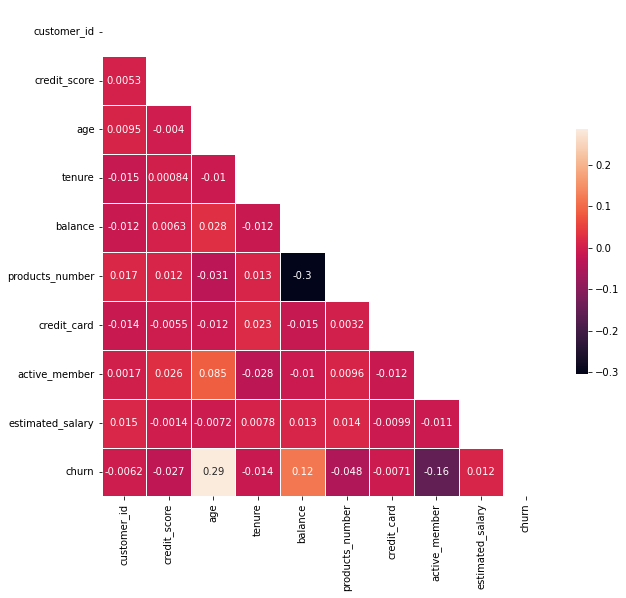

In [718]:
# Diagonal correlation matrix

corr = bank_cust_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corr, mask=mask,  linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

It looks like there is almost no correlation between any variables. Some scatter plots explains more insight :

1. Most of the people range from age 20 to 90 has has zero salary. May be they do not having balance in thier accounts.
2. Most of the people range from age 20 to 90 has zero balance in there accounts
3. People has lot salary but don't have balance in there account, which made me think that what are they doing with their salaries.


<AxesSubplot:xlabel='age', ylabel='churn'>

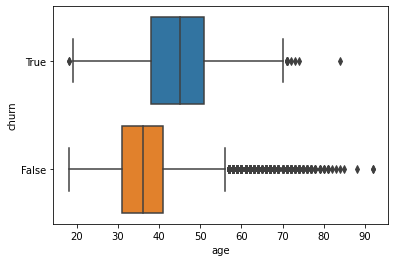

In [719]:
churn = bank_cust_df["churn"].replace({0: "False", 1: "True"}, inplace=False)
sns.boxplot(data = bank_cust_df, x="age", y=churn)

## Data Processing

In [720]:
bank_cust_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

1. Delete unwanted columns such as "customer_id" and "credit_score"
2. Convert catergorical variable such as "country" and "gender" into numerical manually because we has very less categories
3. Performing test-train split 
4. Scaling the dataset using Standart Scaller on test and train datasets simultaniously

#### Delete unwanted columns such as "customer_id" and "credit_score"

In [721]:
#Deleteing unwanted columns
bank_cust_df.drop(['customer_id', 'credit_score'], axis=1, inplace=True)

In [722]:
bank_cust_df.columns

Index(['country', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

#### Convert catergorical variable such as "country" and "gender" into numerical manually because we has very less categories

In [723]:
#Convert catergorical variable such as "country" and "gender" into numerical
bank_cust_df['country'] = bank_cust_df['country'].map({'France':0, 'Germany':1 ,'Spain':2})
bank_cust_df['gender'] = bank_cust_df['gender'].map({'Male':0, 'Female':1})

In [724]:
bank_cust_df.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,1,41,1,83807.86,1,0,1,112542.58,0
2,0,1,42,8,159660.80,3,1,0,113931.57,1
3,0,1,39,1,0.00,2,0,0,93826.63,0
4,2,1,43,2,125510.82,1,1,1,79084.10,0


#### Performing test-train split 

In [725]:
features = bank_cust_df.drop("churn", axis =1)
X_train, X_test, y_train, y_test = train_test_split(features,bank_cust_df["churn"],test_size=0.20,random_state=10)
print(f"X_train data is {X_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"X_test data is {X_test.shape}")
print(f"y_test data is {y_test.shape}")

X_train data is (8000, 9)
y_train data is (8000,)
X_test data is (2000, 9)
y_test data is (2000,)


#### Scaling the dataset using Standart Scaller on test and train datasets simultaniously

In [726]:
# Perfroming the scaling for Train Set
# joining X_train and y_train for scaling training set
train_set = X_train.join(pd.DataFrame(y_train))
train_set.columns

# performing scaling method
scaler = StandardScaler()
model = scaler.fit(train_set)
scaled_data = model.transform(train_set)
train_tr = pd.DataFrame(scaled_data)
train_tr.columns = ['country', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']
train_tr.describe()

# separating scaled X_train and y_train from training set
X_train_tr = train_tr.drop("churn", axis=1) 
y_train_tr = train_tr["churn"]

In [727]:
# Perfroming the scaling for Test Set
# joining X_test and y_test for scaling training set
test_set = X_test.join(pd.DataFrame(y_test))
test_set.columns

# performing scaling method
scaler = StandardScaler()
model = scaler.fit(test_set)
scaled_data = model.transform(test_set)
test_tr = pd.DataFrame(scaled_data)
test_tr.columns = ['country', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']
test_tr.describe()

# separating scaled X_test and y_test from testing set
X_test_tr = test_tr.drop("churn", axis=1) 
y_test_tr = test_tr["churn"]

# Algorithm/Model Selection

As we can see this analysis is to identify churn. We can apply few models such as Random Forest or Decision Tree. As is implied by the names "Tree" and "Forest," a Random Forest is essentially a collection of Decision Trees. A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results.

The random forest algorithm is a type of ensemble learning algorithm. This means that it uses multiple decision trees to make predictions. The advantage of using an ensemble algorithm is that it can reduce the variance in the predictions, making them more accurate. The random forest algorithm achieves this by averaging the predictions of the individual decision trees.

The decision tree algorithm is a type of supervised learning algorithm. This means that it requires a training dataset in order to learn how to make predictions. The advantage of using a supervised learning algorithm is that it can learn complex patterns in the data. The disadvantage of using a supervised learning algorithm is that it takes longer to train than an unsupervised learning algorithm.

So finally I picked __Decision Tree Model__. I will be running this model with Hyperparameter and without Hyperparameter.

A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

#### Decision Tree Model without Hyperparameter

In [728]:
model = DecisionTreeClassifier()
model.fit(X_train_tr, y_train)
train_accuracy = model.score(X_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {train_accuracy}")

Accuracy of Decision Tree Model ---> 0.7875


In [729]:
prediction = model.predict(X_test_tr)

In [730]:
cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)
cnf_matrix

array([[1349,  229],
       [ 196,  226]], dtype=int64)

#### Decision Tree Model with Hyperparameter

In [731]:
model_hyper = DecisionTreeClassifier(max_depth=10)
model_hyper.fit(X_train_tr, y_train)
train_accuracy_hyper = model_hyper.score(X_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {train_accuracy_hyper}")

Accuracy of Decision Tree Model ---> 0.841


In [732]:
prediction_hyper = model.predict(X_test_tr)

In [733]:
cnf_matrix_hyper = confusion_matrix(y_test, prediction_hyper)
np.set_printoptions(precision=2)
cnf_matrix_hyper

array([[1349,  229],
       [ 196,  226]], dtype=int64)

## Conclusion

I notice that Model with hyperparameter perform much better than the model which was trained without any hyperparameter.
As you can see, just by using one HyperParameter we have significantly increase out accuracy from 78 to 83. 

In these dataset, first I perform some basic analysis and visualisation to understand the behaviour of the dataset. Then perform some preprocessing, which is deleteing unwanted columns, converting categorical variable into numerical, performing train test split and at last standarisation. 

Then at the end I train out Decision Tree Model twice, one without HyperParameter and then by using HyperParameter.


----------------------

# '50 Startups'

This particular dataset holds data from 50 startups in New York, California, and Florida. The features in this dataset are R&D spending, Administration Spending, Marketing Spending, and location features, while the target variable is: __Profit__

Goal is to predict the profit of startup profit on the bases of data provided which are on the bases of Research and Development Spend(R&D Spend), Administration Spend, Marketing Spend and State. This model can help those people who want to invest in startup company by analysing profit of the comapny.

I have used multiple regression in this model to predict __Profit__(dependent variable) on bases of multiple field(independent variables).

In [734]:
startup_df = pd.read_csv("50_Startups.csv")
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [735]:
startup_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data Exploration

Listed below are various fields in this dataset.

1. R&D spending: The amount which startups are spending on Research and development.
2. Administration spending: The amount which startups are spending on the Admin panel.
3. Marketing spending: The amount which startups are spending on marketing strategies.
4. State: To which state that particular startup belongs.
5. Profit: How much profit that particular startup is making.

After acquiring the dataset we do rigorous data accountability checking to inspect how good data we have by checking.

In [736]:
startup_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No missing value found and values seems make sense to proceed. Then we see the pairplot of whole dataset.

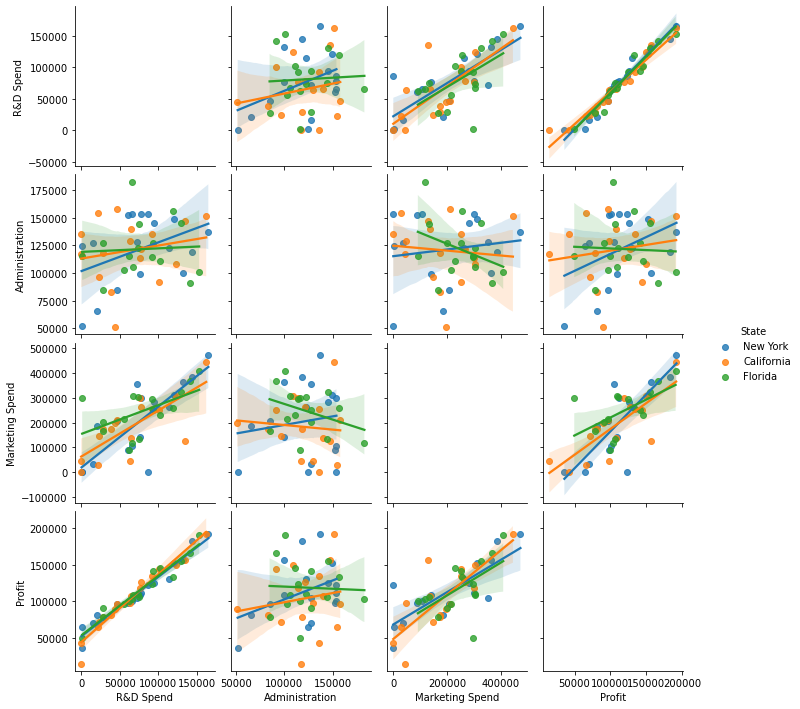

In [737]:
# Numerical columns
sns.pairplot(startup_df, kind="reg", diag_kind="",  hue="State")
plt.show()

## Correlation of each variable

In [738]:
corr=startup_df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


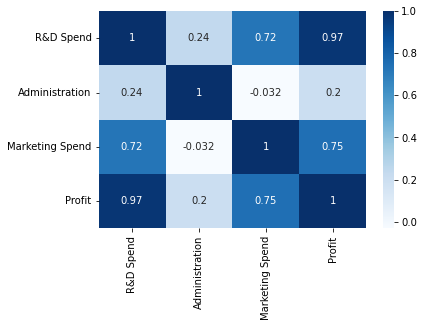

In [739]:
# Correlation matrix
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

Here we can see the direct correlation with profit from how it is shown in the heatmap of the correlation plot.

<AxesSubplot:>

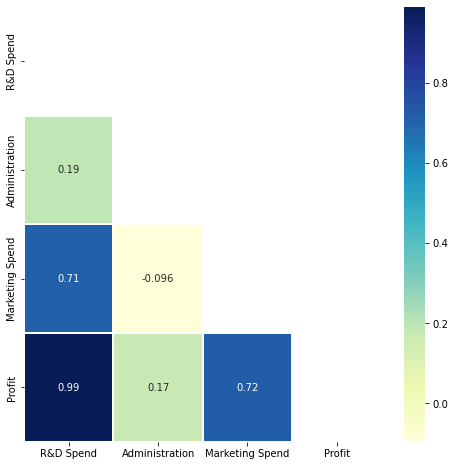

In [740]:
corrmat = startup_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

matrix = np.triu(corrmat)
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.01, mask=matrix, annot = True)

More blueish indicates the variable is correlated with the profit, so we can say R&D Spending and Marketing is the most correlated to the profit

In [741]:
startup_df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

Lets do label Encoding on origional dataset

## Model Development

In [742]:
# spliting Dataset in Dependent & Independent Variables
data_x = startup_df.iloc[:, :-1].values
data_y = startup_df.iloc[:, 4].values

Label Encoder: Encode labels with values between 0 and n_classes-1.

In [743]:
labelencoder = LabelEncoder()
data_x[:, 3] = labelencoder.fit_transform(data_x[:, 3])
data_x1 = pd.DataFrame(data_x)
data_x1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [744]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,train_size=0.7,random_state=0)

In [745]:
# Model Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


Testing the model using the predict function

In [746]:
y_pred = model.predict(x_test)
y_pred

array([104055.18, 132557.6 , 133633.01,  72336.28, 179658.27, 114689.63,
        66514.82,  98461.69, 114294.7 , 169090.51,  96281.91,  88108.3 ,
       110687.12,  90536.34, 127785.38])

In [747]:
# Testing Score
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data: ",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data :",training_data_model_score)

Model Score/Performance on Testing data:  0.9355139722149948
Model Score/Performance on Training data : 0.9515496105627431


## Result Comparison 

In [748]:
result_data = pd.DataFrame(data={'Actual Value':y_test.flatten(), 'Predicted value':y_pred.flatten()})
result_data

,Actual Value,Predicted value
0,103282.38,104055.184238
1,144259.40,132557.602897
2,146121.95,133633.012845
3,77798.83,72336.280811
4,191050.39,179658.272109
5,105008.31,114689.631334
6,81229.06,66514.822490
7,97483.56,98461.693213
8,110352.25,114294.704870
9,166187.94,169090.511275


As we can see that the predicted value is close to the actual values i.e the one present in the testing set.
Hence we can use this model for prediction.

## Model Evaluation

In [749]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946438


In [750]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716635


In [751]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580019


## Conclusion

The mean absolute error is 6503.577323580025. So our predicted value can be 6503.577323580025 units more or less than the actual value. Using the dataset that also involved other variables of startup profits such as financial ratios, corporate actions, stock price of the company if it has traded in the market, etc.

We had two choices to analyze this dataset a)Simple Linear Regression b) Multiple Linear Regression. Unlike Simple Linear Regression where there is one independent variable and one dependent variable — in Multiple Linear Regression there are several independent variables that could have an effect on determining the dependent variable. So Multiple Linear Regression is a suitable algorithm to solve this problem. 

Using Multiple Linear Regression, this is how we can predict the profit of a company for a particular period. 

As we see our predicted value is 6503.577323580025 so this algorithm can be trusted by the the business. I see having more data would help predicting more accurate result with least errors but data to be fitting in to the model else we have to look in to under fitting and over fitting states.

In first dataset, we are trying to predict bank customer chrun which appears to be a decision tree problem in second problem we had option for Multiple Linear Regression there are several independent variables that could have an effect on determining the dependent variable. These two are separate datasets to predict the results using different algorithm



## References 
https://www.kaggle.com/code/kavita5/linear-regression-50-startup/data

https://www.researchgate.net/publication/332683140_Predictions_for_Startups

https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3878-2019.pdf
